In [8]:
#___________________________________________________________________________________________________________________
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

import matplotlib.pyplot as plt
import sys
import os
sys.path.append("./src/")
from sub_mesh        import * 
from sub_data        import * 
from sub_plot        import * 
from sub_climatology import *
from sub_index       import *
from colormap_c2c    import colormap_c2c
import time as time 
import shapefile as shp

#___LOAD FESOM2 MESH___________________________________________________________________________________
meshpath='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
mesh=load_mesh_fesom2(meshpath, do_rot='None', focus=0, do_info=True, do_pickle=True,
                      do_earea=True, do_narea=True, do_eresol=[True,'mean'], do_nresol=[True,'eresol'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
 > found *.pckl file: /work/ollie/pscholz/meshcache_tripyview/core2
 > load  *.pckl file: tripyview_fesom2_core2.pckl
___FESOM2 MESH INFO________________________
 > path            = /work/ollie/projects/clidyn/FESOM2/meshes/core2
 > id              = core2
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = True
 > do earea,eresol = True, True
 > do narea,nresol = True, True
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________


In [14]:
datapath        = '~/results/test_speed_core2/1/'
vname           = 'temp'
year            = [1958,2009]
mon, day, record= None, None, None
depth           = None #np.arange(1000,2000+1,100)
data            = load_data_fesom2(mesh, datapath, vname=vname, 
                                   year=year, mon=mon, day=day, record=record, 
                                   descript=vname, do_tarithm=None)

box = []
#box.append([-80,20,0,85])
# box.append(shp.Reader('src/shapefiles/ocean_basins/Atlantic_Basin.shp'))
# box.append(shp.Reader('src/shapefiles/ocean_basins/Pacific_Basin.shp'))
box.append(shp.Reader('src/shapefiles/ocean_basins/Eurasian_Basin.shp'))
index_list, idx_IN   = load_index_fesom2(mesh, data, box)

___FESOM2 DATA INFO________________________
 > Dimensions : Frozen(SortedKeysDict({'time': 52, 'nod2': 126858, 'nz1': 47}))
 > Coordinates:
  * nz1      (nz1) float64 2.5 7.5 15.0 25.0 ... 5.525e+03 5.825e+03 6.125e+03
  * time     (time) datetime64[ns] 1958-12-31T23:15:00 ... 2009-12-31T23:15:00
 > Data variables:
    temp     (time, nod2, nz1) float32 -0.45928845 -0.45847926 ... nan nan
 ___________________________________________


/home/ollie/pscholz/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<IPython.core.display.Javascript object>


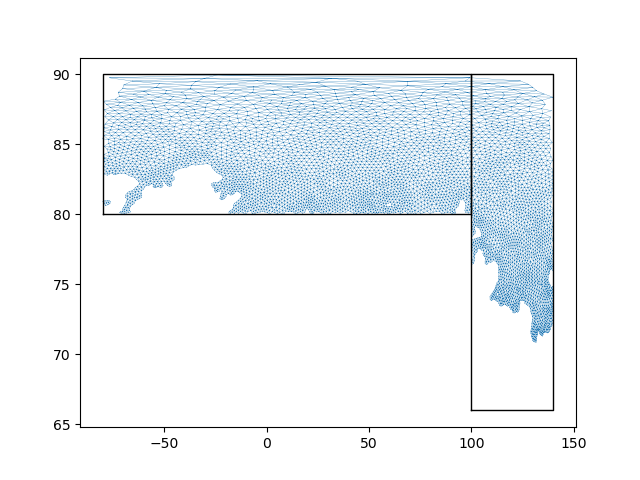

In [20]:
plot_index_region(mesh,idx_IN,box)

<IPython.core.display.Javascript object>


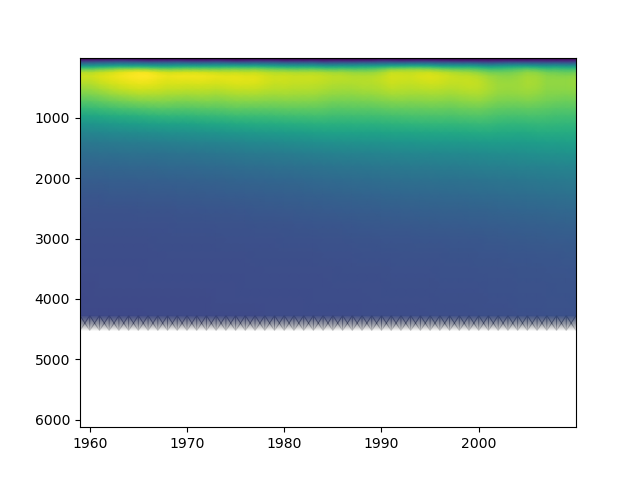

/home/ollie/pscholz/miniconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [17]:
plt.figure()
for index in index_list:
    if len(index[vname].dims)==2:
        plt.pcolormesh(index.coords[index[vname].dims[0]].values, 
                   index.coords[index[vname].dims[1]].values,
                   index[vname].data.transpose(), shading='gouraud' )
        
    else:
        plt.plot(index[vname].data, index.coords['nz1'].values, marker='o', markersize=3)
plt.gca().invert_yaxis()



In [22]:
dname = '/home/ollie/pscholz/tripyview_github/src/shapefiles/moc_basins/'
fname_geojson = 'MOCBasins.geojson'
convert_geojson2shp(os.path.join(dname,fname_geojson),dname)

In [13]:
shppath = '/home/ollie/pscholz/tripyview_github/src/shapefiles/ocean_basins/'
boxlist = [[-80,100,80,90], [100,140,66,90]]
boxnamelist='Eurasian Basin'
convert_box2shp(boxlist, boxnamelist, shppath)